In [1]:
import streamlit as st
from datetime import date
from datetime import datetime, timedelta
import yfinance as yf
from plotly import graph_objs as go
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import json

import sys
sys.path.append('../')
from datamover import DataMover
from datamover import ModelPlot
import statsmodels.api as sm
from pylab import rcParams
# from statsmodels.tsa.arima_model import ARIMA  # Depricated
from statsmodels.tsa.arima.model import ARIMA
import mplfinance as mpf

In [2]:
plt.rc('patch', force_edgecolor=True,edgecolor='black')
plt.rc('hist', bins='auto')
style.use('seaborn-darkgrid')
sns.set_context('notebook')
sns.set_palette('gist_heat')
st.set_page_config(layout='wide')

In [3]:
today = date.today().strftime("%Y-%m-%d")
mover = DataMover("2018-04-26", today)
ticker_list = ["AAPL", "GOOG", "MSFT", "TSLA"]

In [6]:
data = mover.load_data(ticker_list[0])

[*********************100%***********************]  1 of 1 completed


In [7]:
def datetime_range(start=None, end=None):
    span = end - start
    for i in range(span.days + 1):
        yield start + timedelta(days=i)
date_index = list(datetime_range(start=datetime(2018, 4, 26), end=datetime(2021, 4, 26)))


In [8]:
data.Date = pd.to_datetime(data.Date)
# date_index = pd.DataFrame(date_index)
# date_index= date_index.rename(columns= {0:"dates"})
data.set_index('Date', inplace=True)
data.sort_index(inplace=True, ascending=True)

In [9]:
thin_data = data.resample('2w').mean()

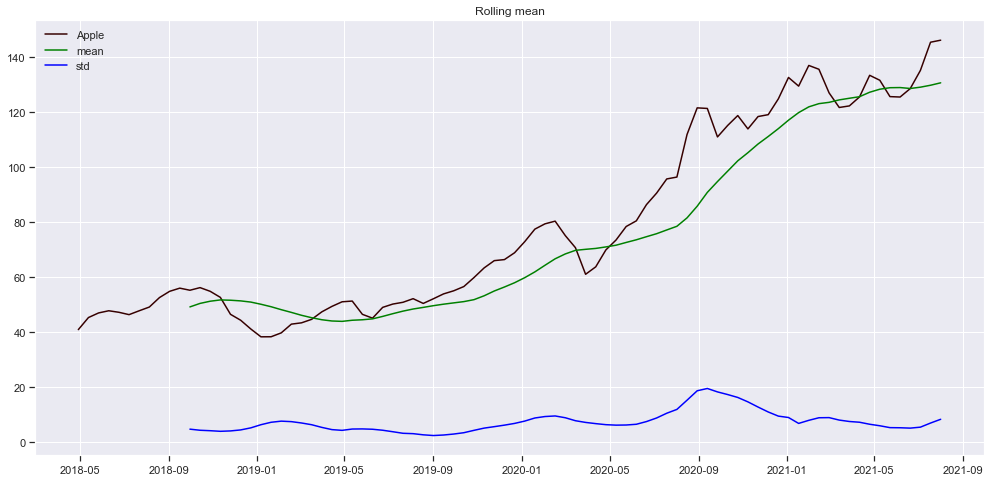

In [10]:
mplot = ModelPlot()
mplot.decomp_plot(thin_data['Close'])

In [11]:
def tripleGraph(data):
    chart1 = data
    chart2 = data.rolling(window = 12).mean().dropna()
    chart3 = data.rolling(window = 12).std().dropna()
    # %%
    df = pd.concat([chart1, chart2, chart3], axis=1)
    # %%
    df.columns=['Close', 'Rolling Mean', 'Rolling Std']

    st.title('Rolling value decomposition on Apple stock')
    st.line_chart(df, width=800)

    col1, col2, col3 = st.beta_columns(3)
    with col1:
        st.line_chart(df['2018-04-28':'2019-04-28'], width=200)
    with col2:
        st.line_chart(df['2019-04-28':'2020-04-28'], width=200)
    with col3:
        st.line_chart(df['2020-04-28':'2021-04-28'], width=200)


In [12]:
tripleGraph(thin_data['Close'])

2021-07-30 13:37:57.824 WARNING root: 
  command:

    streamlit run ipykernel_launcher [ARGUMENTS]


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=thin_data['Close'], x=thin_data['Close'].index, name="Close"))
fig.add_trace(go.Scatter(y=thin_data['Open'], x=thin_data['Open'].index, name="Open"))
fig.add_trace(go.Scatter(y=thin_data['High'], x=thin_data['High'].index, name="High"))
fig.add_trace(go.Scatter(y=thin_data['Low'], x=thin_data['Low'].index, name="Low"))
fig.update_layout(legend_title_text='I have a title')

st.plotly_chart(fig, key="seaborn-darkgrid")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

/Users/Dom/Repos/enviorments/streamlit_docker_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



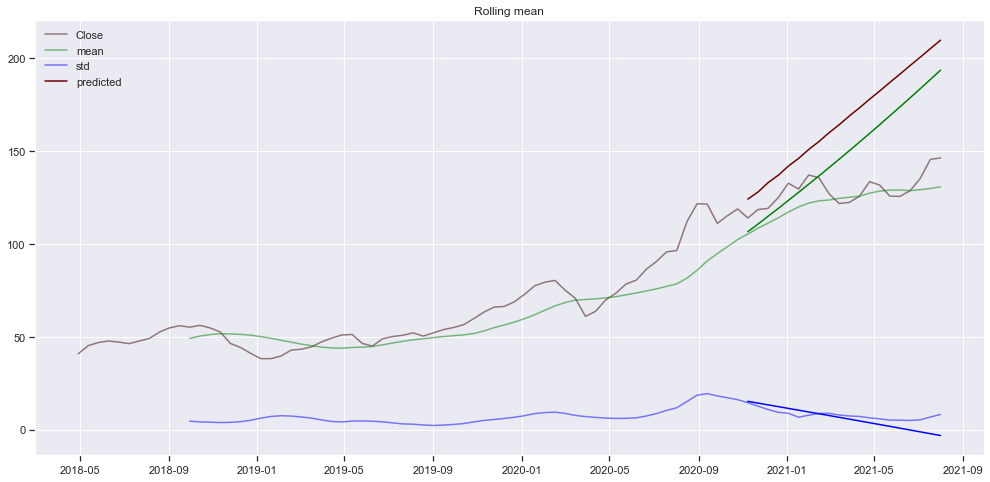

In [14]:
mplot.plot_arima(thin_data, 'Close')

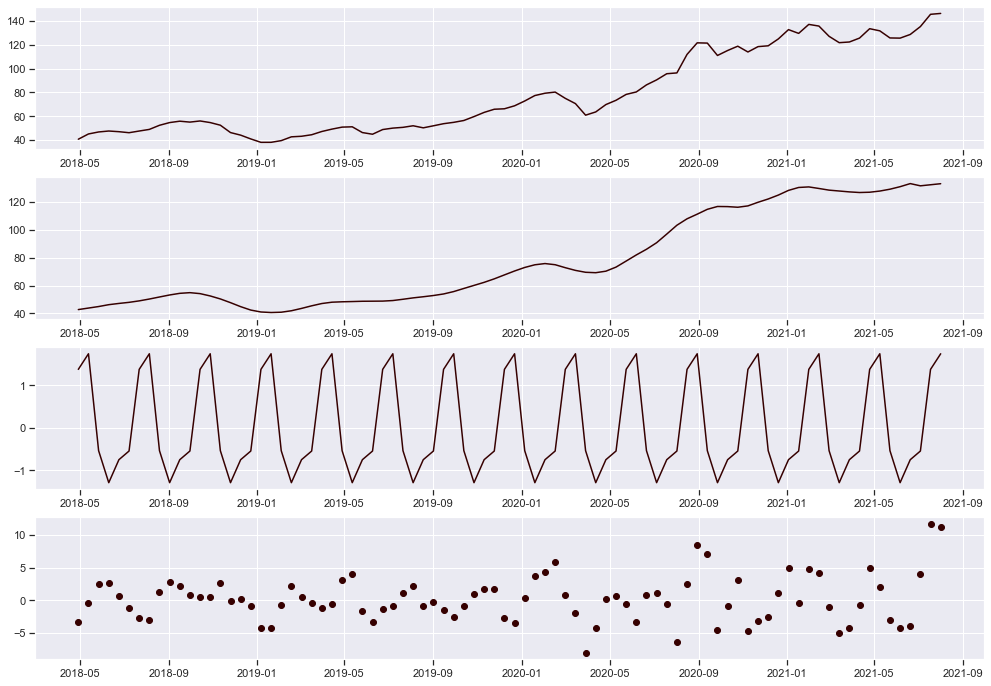

In [15]:
rcParams['figure.figsize'] = 17, 12
decomp = sm.tsa.seasonal_decompose(thin_data['Close'], model='additive', extrapolate_trend='freq', period=6)
# decomp.plot()
# plt.show()

fig, axes = plt.subplots(4, 1, figsize=(17, 12))
axes[0].plot(thin_data['Close'])
axes[1].plot(decomp.trend)
axes[2].plot(decomp.seasonal)
axes[3].scatter(thin_data.index.values, decomp.resid)


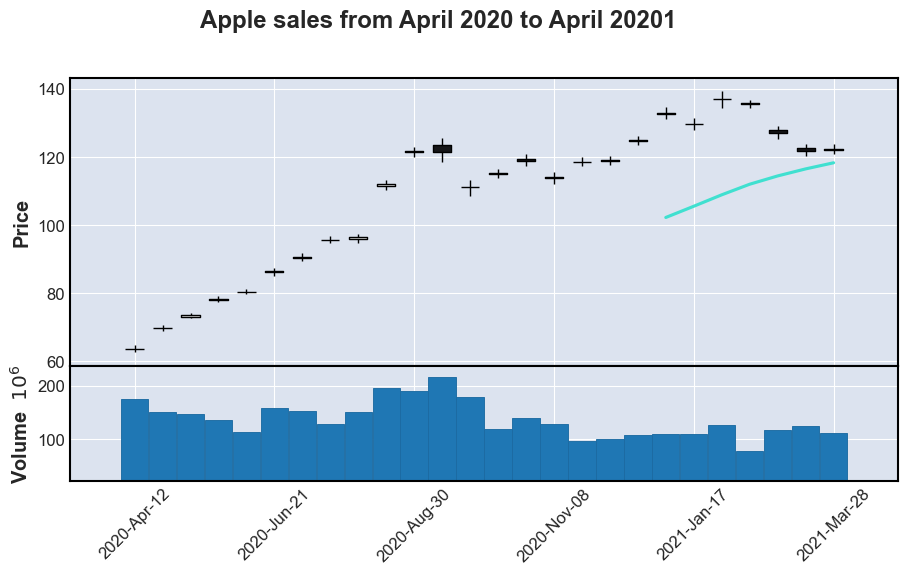

In [16]:
mpf.plot(thin_data["2020-04-01": "2021-04-01"], figratio=(12,6), 
            type='candle', mav=(20), 
            volume=True, title='Apple sales from April 2020 to April 20201')

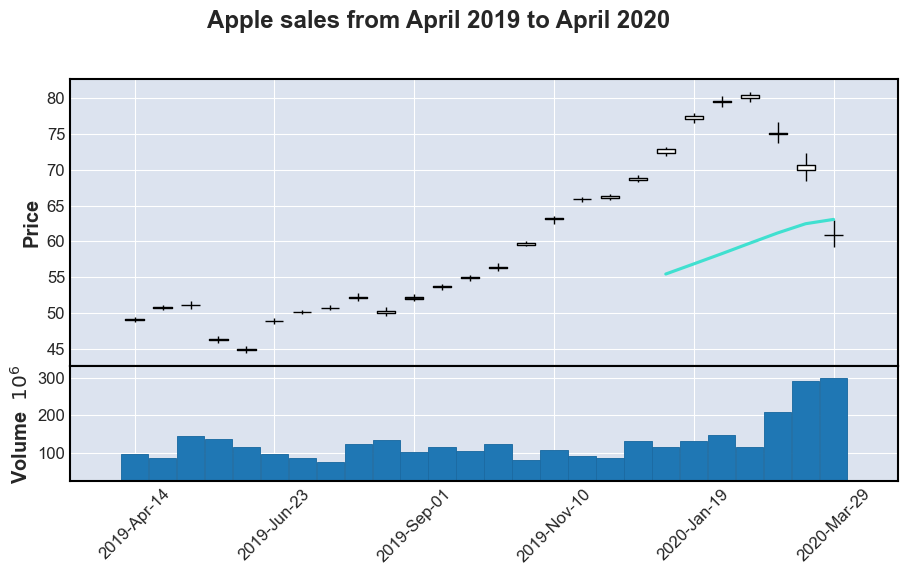

In [17]:
mpf.plot(thin_data["2019-04-01": "2020-04-01"], figratio=(12,6), 
            type='candle', mav=(20), 
            volume=True, title='Apple sales from April 2019 to April 2020')